# Red Wine Quality Prediction

Problem Statement:
    
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available 
(e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced 
(e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.



Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at 
e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and 
the AUC value.


We need to build a classification model. 



Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [48]:
# Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [49]:
wine = pd.read_csv('winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exploratory Data Analysis (EDA)

# Data Pre-processing

In [50]:
# Checking sample of the dataset

wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
168,6.8,0.630,0.07,2.1,0.089,11.0,44.0,0.99530,3.47,0.55,10.4,6
1532,7.2,0.530,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,6
156,7.1,0.430,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.5,5
129,6.1,0.380,0.15,1.8,0.072,6.0,19.0,0.99550,3.42,0.57,9.4,5
612,7.5,0.640,0.00,2.4,0.077,18.0,29.0,0.99650,3.32,0.60,10.0,6
1304,7.6,0.790,0.21,2.3,0.087,21.0,68.0,0.99550,3.12,0.44,9.2,5
70,7.7,0.630,0.08,1.9,0.076,15.0,27.0,0.99670,3.32,0.54,9.5,6
1423,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,0.67,11.0,4
1108,8.1,0.780,0.10,3.3,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,5
345,7.0,0.685,0.00,1.9,0.067,40.0,63.0,0.99790,3.60,0.81,9.9,5


In [51]:
wine.shape

(1599, 12)

In [52]:
# Checking column names

wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [53]:
# Checking the information of the dataset

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
wine.value_counts

<bound method DataFrame.value_counts of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6   

In [55]:
# Checking dtypes of the  dataset

wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [56]:
# Checking null values

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

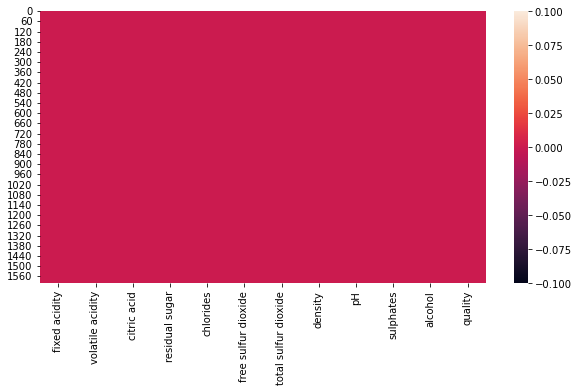

In [57]:
# Checking null values in heat map

plt.figure(figsize=(10,5))
sns.heatmap(wine.isnull())

Analysis:
    
Dataset contains 1599 rows and 12 columns

We will consider column -'quality' as our target variable

All the input variables are float data types and output variable is integer

We dont find any null values in our dataset

As it is mentioned in our case study, we will be converting our target variable from regression to classification
before proceeding to model evaluation, we will move on to Visualization, Data Feature Selection and Engineering to do further analysis on the dataset

# Visualization: Univariate  Analysis

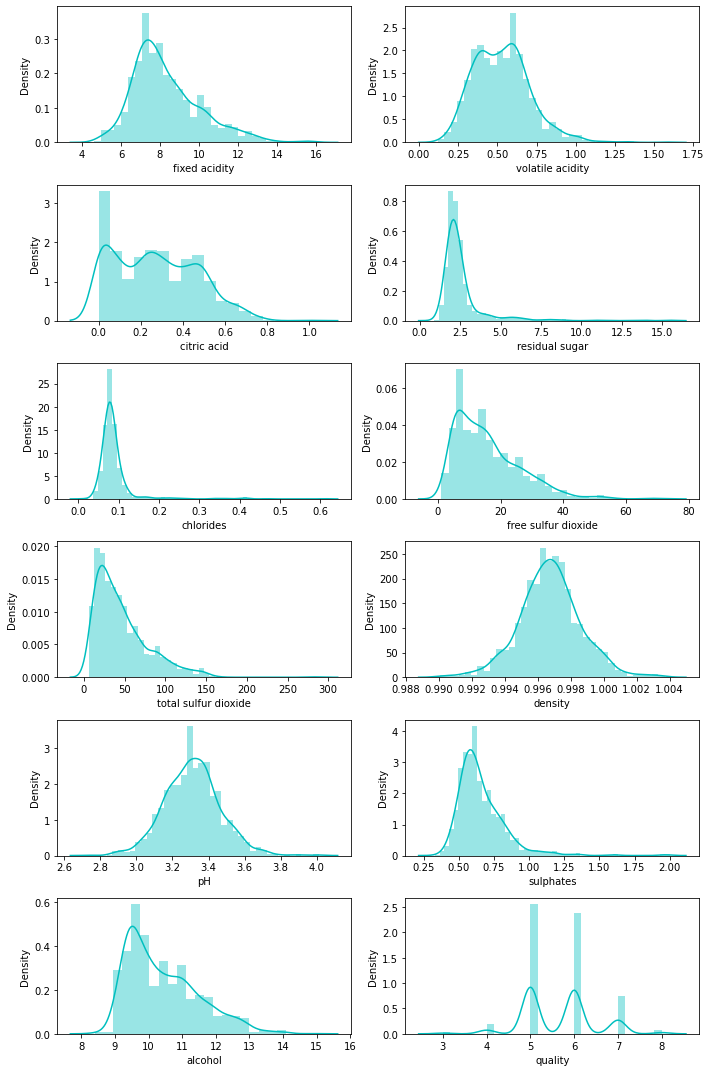

In [58]:
# Visualizing the dataset with distribution plot to check the distribution

plt.figure(figsize=(10,15))
plot_number=1
for i in wine.columns[0:12]:
    if plot_number <=12:
        ax=plt.subplot(6,2,plot_number)
        sns.distplot(wine[i],color='c')
        plt.xlabel(i,fontsize=10)
    plot_number+=1
plt.tight_layout()

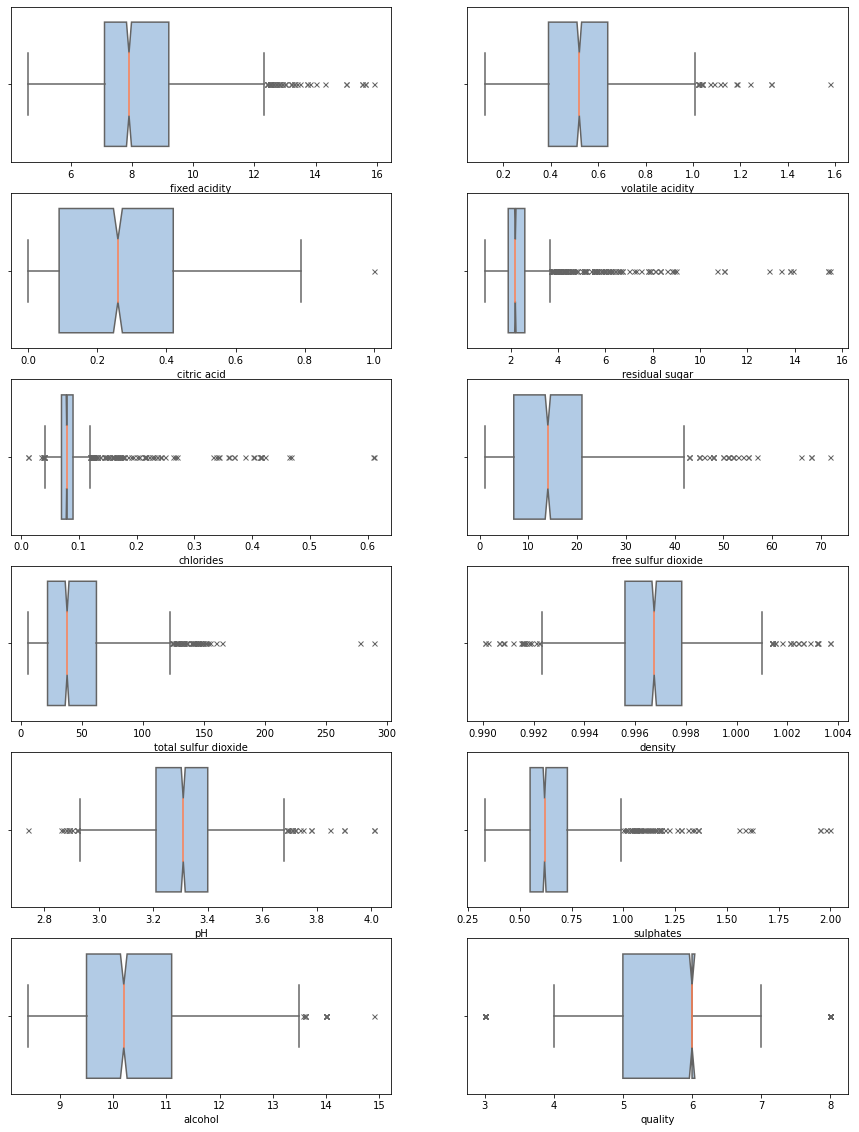

In [59]:
# Visualizing the dataset with boxplot to check Outliers

plt.figure(figsize=(15,20))
st = 1
for i in wine.columns:
    if st <=12:
        sub = plt.subplot(6,2,st)
        sns.boxplot(wine[i],color='coral',notch=True,boxprops={"facecolor": (.4, .6, .8, .5)},
                    medianprops={"color": "coral"},flierprops={"marker": "x"})
        plt.xlabel(i,fontsize=10)
    st+=1
plt.show()
        

# Visualization: Bivariate Analysis

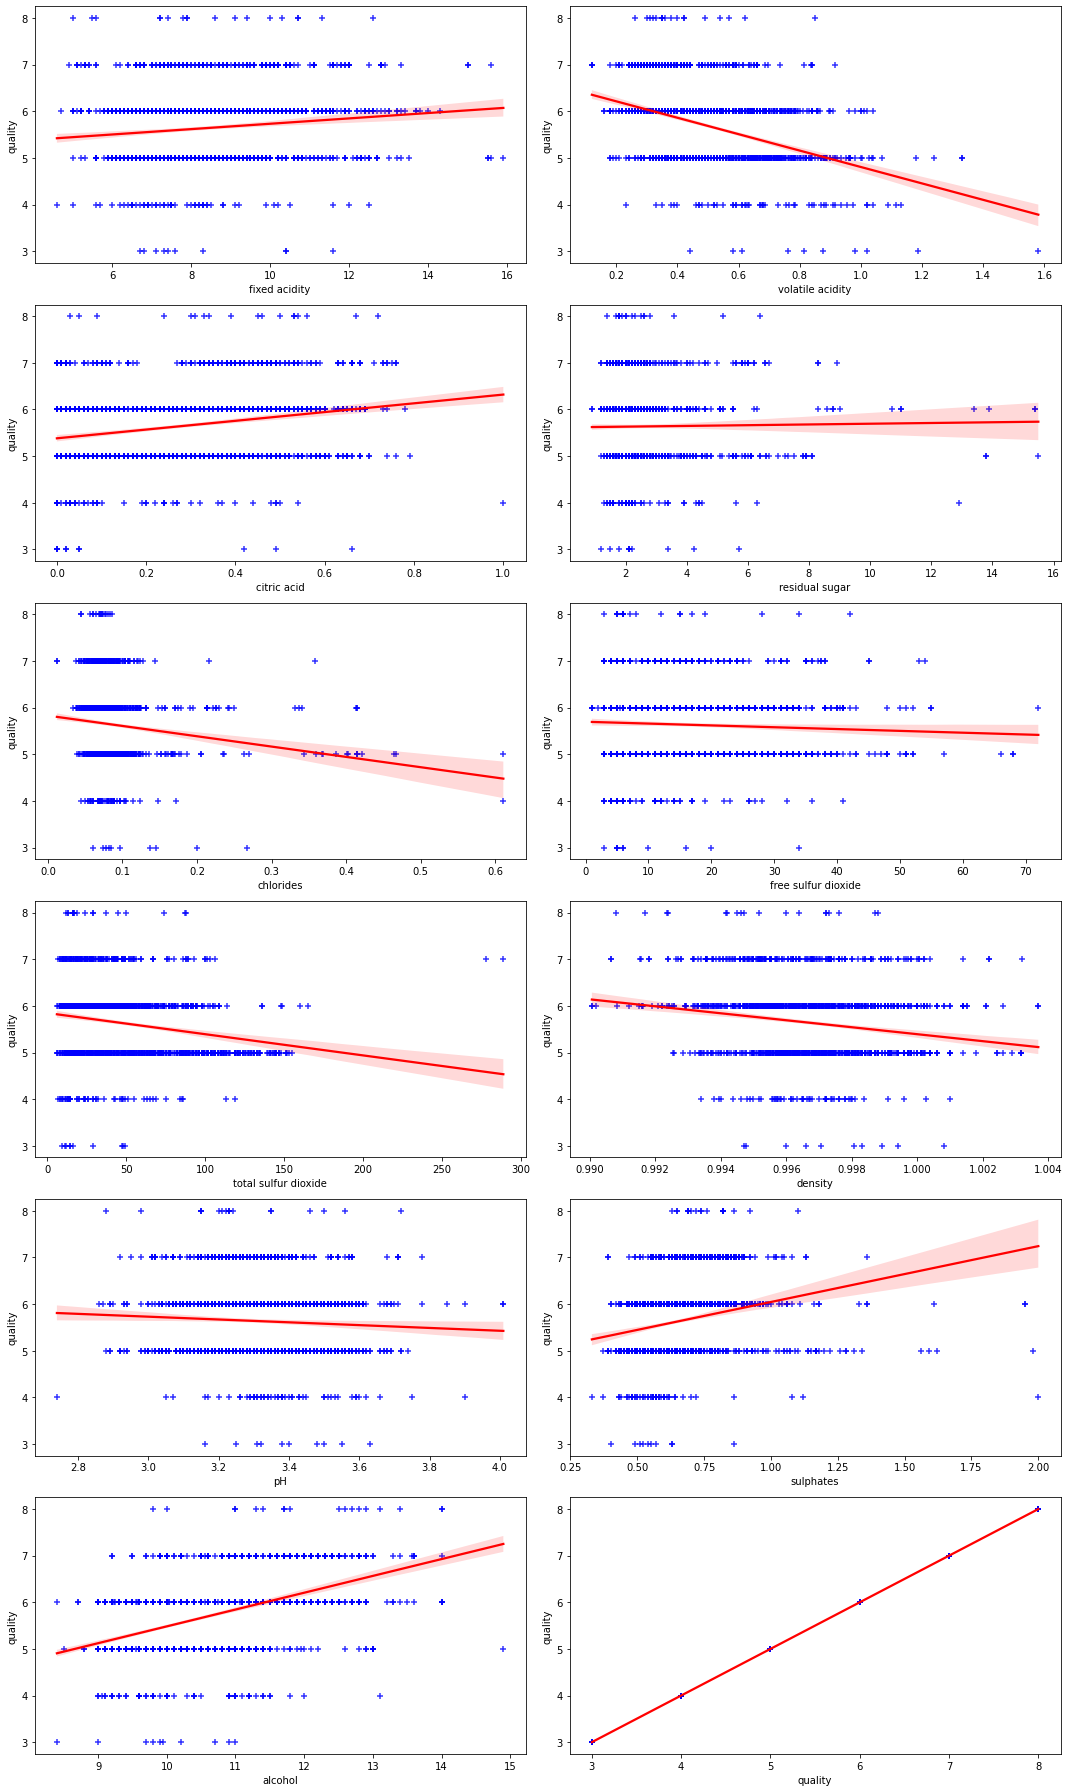

In [60]:
# Visualizing the dataset with regplot with target variable

plt.figure(figsize=(15,25))
plot_number=1
for i in wine.columns:
    if plot_number <=12:
        ax=plt.subplot(6,2,plot_number)
        sns.regplot(x=wine[i],y=wine['quality'],scatter_kws={"color": "blue"}, line_kws={"color": "red"},marker='+')
        plt.xlabel(i,fontsize=10)
    plot_number+=1
plt.tight_layout()

Univariate Analysis:
    
By using distribution plot on feature variables we can see most of the data is skewed on right

Only PH and Density are normally distributed

By using Boxplot we can identify outliers present in all the columns


Bivariate Analysis:
    
Used regplot for evaluating the associations of the feature variable with target variable(quality)

When value increases in fixed acidity, citric acid, sulphates and alcohol the quality is also increasing

When value increases in involatile acidity, chlorides,free sulfur dioxide, total sulfur dioxide, density and ph
the quality is decreasing

# Data Feature Selection and Engineering

In [61]:
# Checking the datset with describe method

In [62]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Analysis:
    
The mean is more than median (50th percentile) in all columns

There is a large difference in 75th percentile and max is residual sugar, free sulfur dioxide, total sulfur dioxide

The 1 and 2 observations suggest that there are extreme outliers present in these three columns

In [63]:
# checking correlation

wine.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

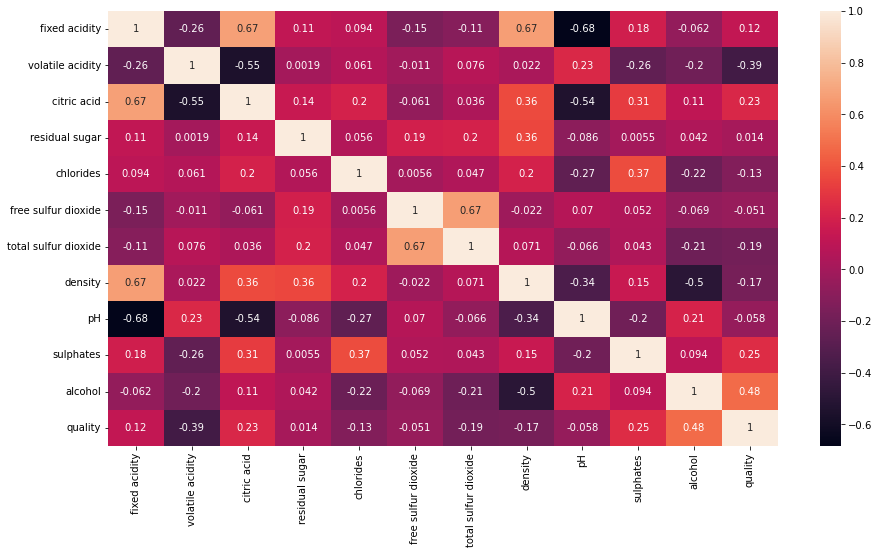

In [64]:
# Checking the correlation of the dataset with heatmap

plt.figure(figsize=(15,8))
sns.heatmap(wine.corr(),annot=True)

Analysis:
    
Quality is highly correlated with alcohol

Alcohol is negatively correlated with density 

PH is highly negatively correlated with citrix and fixed acidity 

Density is highly positively correlated with residual sugar

volatile acidiity is negatively correlated with quality

free sulphuric acid is highly correlated with total sulfur dioxide

In [65]:
# checking skewness of the data

wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [66]:
# Removing outliers with Z score

from scipy.stats import zscore

wine_z = wine[wine.columns]
wine_z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [67]:
z = np.abs(zscore(wine_z))
threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [68]:
wine_new = wine_z[(z<3).all(axis=1)]

In [69]:
wine.shape

(1599, 12)

In [70]:
wine_new.shape

(1451, 12)

In [71]:
# Checking the data loss

data_loss = (1599-1458)/1599*100
data_loss

8.818011257035648

In [72]:
# Checking skewness

wine_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [73]:
# Removing skewness using power transform function

from sklearn.preprocessing import PowerTransformer 

skew = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

pt = PowerTransformer(method='yeo-johnson')
wine_new[skew] = pt.fit_transform(wine_new[skew].values)

In [74]:
wine_new.skew()

fixed acidity           0.018666
volatile acidity        0.380659
citric acid             0.291297
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                 0.055738
pH                      0.114705
sulphates               0.020799
alcohol                 0.114658
quality                 0.407865
dtype: float64

Skewness was reduced after applying Power Transformer method

we will not drop quality as that is our target variable

In [75]:
# Checking VIF inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = wine_new.iloc[:,0:11]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.467878,0.700,0.00,-0.610683,-0.145035,-0.241492,-0.066536,0.99780,3.51,-0.589657,-1.120424
1,-0.170805,0.880,0.00,0.649155,0.986838,1.091561,0.952517,0.99680,3.20,0.451524,-0.530340
2,-0.170805,0.760,0.04,0.207601,0.718578,0.238587,0.624244,0.99700,3.26,0.220005,-0.530340
3,1.573404,0.280,0.56,-0.610683,-0.207213,0.440493,0.784119,0.99800,3.16,-0.393177,-0.530340
4,-0.467878,0.700,0.00,-0.610683,-0.145035,-0.241492,-0.066536,0.99780,3.51,-0.589657,-1.120424
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.555136,0.600,0.08,-0.374766,0.622975,1.530980,0.316130,0.99490,3.45,-0.393177,0.287037
1595,-1.885464,0.550,0.10,0.031772,-1.120575,1.895825,0.537893,0.99512,3.52,0.992572,0.901563
1596,-1.451007,0.510,0.13,0.207601,-0.145035,1.353642,0.173970,0.99574,3.42,0.930432,0.742882
1597,-1.885464,0.645,0.12,-0.374766,-0.207213,1.530980,0.316130,0.99547,3.57,0.666655,-0.034166


In [76]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

     VIF Factor              Features
0      3.379722         fixed acidity
1     19.096584      volatile acidity
2      8.651239           citric acid
3      1.247627        residual sugar
4      1.229957             chlorides
5      2.799413   free sulfur dioxide
6      3.138506  total sulfur dioxide
7   1343.518453               density
8   1323.550514                    pH
9      1.271249             sulphates
10     1.498343               alcohol


VIF is very high in density and PH

Volatile acidity also got high VIF

let's apply scaling method before dropping the high VIF column

In [77]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x1 = pd.DataFrame(st.fit_transform(x),columns=x.columns)
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.467878,1.050914,-1.390400,-0.610683,-0.145035,-0.241492,-0.066536,0.635485,1.375896,-0.589657,-1.120424
1,-0.170805,2.119336,-1.390400,0.649155,0.986838,1.091561,0.952517,0.052390,-0.821951,0.451524,-0.530340
2,-0.170805,1.407054,-1.180831,0.207601,0.718578,0.238587,0.624244,0.169009,-0.396561,0.220005,-0.530340
3,1.573404,-1.442071,1.543569,-0.610683,-0.207213,0.440493,0.784119,0.752103,-1.105544,-0.393177,-0.530340
4,-0.467878,1.050914,-1.390400,-0.610683,-0.145035,-0.241492,-0.066536,0.635485,1.375896,-0.589657,-1.120424
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.555136,0.457346,-0.971261,-0.374766,0.622975,1.530980,0.316130,-1.055489,0.950506,-0.393177,0.287037
1447,-1.885464,0.160562,-0.866477,0.031772,-1.120575,1.895825,0.537893,-0.927209,1.446794,0.992572,0.901563
1448,-1.451007,-0.076865,-0.709300,0.207601,-0.145035,1.353642,0.173970,-0.565690,0.737811,0.930432,0.742882
1449,-1.885464,0.724451,-0.761692,-0.374766,-0.207213,1.530980,0.316130,-0.723125,1.801286,0.666655,-0.034166


In [78]:
# Checking VIF after applying scaling method

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
print(vif)

    VIF Factor              Features
0     6.870011         fixed acidity
1     1.837780      volatile acidity
2     2.966028           citric acid
3     1.682277        residual sugar
4     1.265877             chlorides
5     2.820539   free sulfur dioxide
6     3.158303  total sulfur dioxide
7     5.582544               density
8     3.182893                    pH
9     1.371917             sulphates
10    2.856852               alcohol


We can see VIF been reduced after applying Scaling method

# Model Evaluation

In [ ]:
# Splitting X and Y variables for further analysis

In [81]:
x1.shape

(1451, 11)

In [82]:
wine_new['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [83]:
# Converting the Target variable to build classification Model

wine_new['quality'] = wine_new.quality.apply(lambda x:1 if x>=7 else 0)
wine_new['quality'].value_counts()

0    1250
1     201
Name: quality, dtype: int64

In [92]:
y = wine_new['quality']
y.shape

(1451,)

In [94]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x1_train,y_train)
    predLR = LR.predict(x1_test)
    acc = accuracy_score(y_test,predLR)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 93.47079037800687 on Random State 101


We got maximum accuracy score of 93% on Random state 101

Let's create train_test and creat Model for prediction

# Creating train_test_split

In [102]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size = .20,random_state=101)

In [104]:
x1_train.shape

(1160, 11)

In [106]:
x1_test.shape

(291, 11)

# Model Selection

In [113]:
# Importing Required libraries


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [118]:
LG = LogisticRegression()
GN = GaussianNB()
svc = SVC()
DTC = DecisionTreeClassifier()
KNC = KNeighborsClassifier()
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()

Model = [LG,GN,svc,DTC,KNC,RFC,GBC,ABC,BC]

for m in Model:
    m.fit(x1_train,y_train)
    m.score(x1_train,y_train)
    predmod = m.predict(x1_test)
    print("Accuracy Score of", m,"is:")
    print(accuracy_score(y_test,predmod))
    print(confusion_matrix(y_test,predmod))
    print(classification_report(y_test,predmod))
    print('*************************************************************')

Accuracy Score of LogisticRegression() is:
0.9347079037800687
[[254   3]
 [ 16  18]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       257
           1       0.86      0.53      0.65        34

    accuracy                           0.93       291
   macro avg       0.90      0.76      0.81       291
weighted avg       0.93      0.93      0.93       291

*************************************************************
Accuracy Score of GaussianNB() is:
0.9106529209621993
[[235  22]
 [  4  30]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       257
           1       0.58      0.88      0.70        34

    accuracy                           0.91       291
   macro avg       0.78      0.90      0.82       291
weighted avg       0.94      0.91      0.92       291

*************************************************************
Accuracy Score of SVC() is:
0.9312714776632303
[[255   2]
 [

Based on Model testing we can see Logistic Regression, Gradient Boosting and Random Forest Classifier accuracy score
are 93% 

We can select any one from these model, but we can do further analysis by looking into Cross Validation
and Hyper parameter tuning

In [119]:
# Cross Validation to predict which model gives more accuracy to use the model

from sklearn.model_selection import cross_val_score


cr1 = cross_val_score(LG,x1,y, cv=10)
cr2 = cross_val_score(GN,x1,y, cv=10)
cr3 = cross_val_score(svc,x1,y, cv=10)
cr4 = cross_val_score(DTC,x1,y, cv=10)
cr5 = cross_val_score(KNC,x1,y, cv=10)
cr6 = cross_val_score(RFC,x1,y, cv=10)
cr7 = cross_val_score(GBC,x1,y, cv=10)
cr8 = cross_val_score(ABC,x1,y, cv=10)
cr9 = cross_val_score(BC,x1,y, cv=10)

print('CV score of Logistic Regression:',cr1.mean()*100)
print('CV score of GaussianNB:',cr2.mean()*100)
print('CV score of Support Vector Classifier:',cr3.mean()*100)
print('CV score of Decision Tree Classifier:',cr4.mean()*100)
print('CV score of KNeighbors Classifier:',cr5.mean()*100)
print('CV score of Random Forest Classifier:',cr6.mean()*100)
print('CV score of Gradient Boosting Classifier:',cr7.mean()*100)
print('CV score of AdaBoost Classifier:',cr8.mean()*100)
print('CV score of Bagging Classifier:',cr9.mean()*100)

CV score of Logistic Regression: 87.733112895607
CV score of GaussianNB: 83.73075106282475
CV score of Support Vector Classifier: 88.14596126594238
CV score of Decision Tree Classifier: 82.63013698630137
CV score of KNeighbors Classifier: 85.59518186112423
CV score of Random Forest Classifier: 88.76665092111479
CV score of Gradient Boosting Classifier: 87.52574397732641
CV score of AdaBoost Classifier: 87.38545111006142
CV score of Bagging Classifier: 87.24846480869154


# AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [121]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

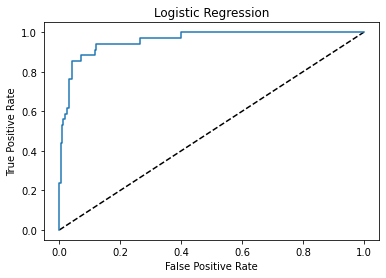

0.7588693064774548

In [126]:
y_pred_prob = LG.predict_proba(x1_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()
auc_score = roc_auc_score(y_test,LG.predict(x1_test))
auc_score

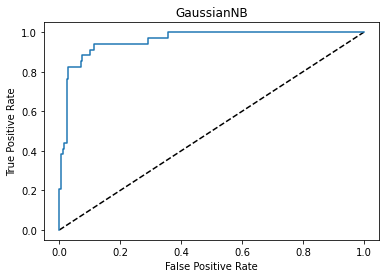

0.8983749141680017

In [127]:
y_pred_prob = GN.predict_proba(x1_test)[:,1]
fpr1,tpr1,thresholds1 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()
auc_score = roc_auc_score(y_test,GN.predict(x1_test))
auc_score

In [ ]:
y_pred_prob = svc.predict_proba(x1_test)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr2,tpr2,label='Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier')
plt.show()
auc_score = roc_auc_score(y_test,svc.predict(x1_test))
auc_score

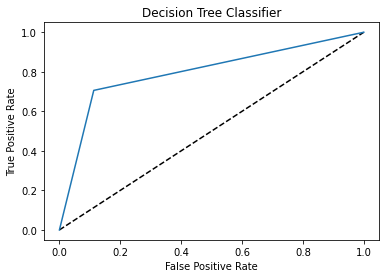

0.7965209430075533

In [130]:
y_pred_prob = DTC.predict_proba(x1_test)[:,1]
fpr3,tpr3,thresholds3 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr3,tpr3,label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score = roc_auc_score(y_test,DTC.predict(x1_test))
auc_score

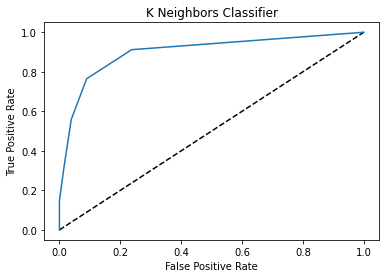

0.7599565117875944

In [132]:
y_pred_prob = KNC.predict_proba(x1_test)[:,1]
fpr4,tpr4,thresholds4 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr4,tpr4,label='K Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K Neighbors Classifier')
plt.show()
auc_score = roc_auc_score(y_test,KNC.predict(x1_test))
auc_score

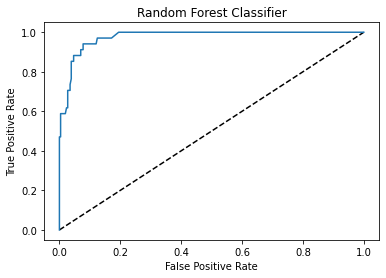

0.8099107347219042

In [133]:
y_pred_prob = RFC.predict_proba(x1_test)[:,1]
fpr5,tpr5,thresholds5 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr5,tpr5,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()
auc_score = roc_auc_score(y_test,RFC.predict(x1_test))
auc_score

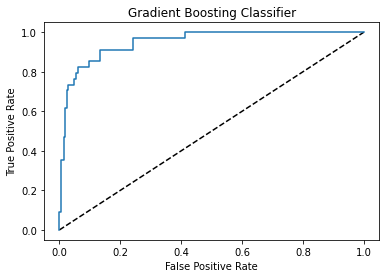

0.7971503776607919

In [136]:
y_pred_prob = GBC.predict_proba(x1_test)[:,1]
fpr6,tpr6,thresholds6 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr6,tpr6,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()
auc_score = roc_auc_score(y_test,GBC.predict(x1_test))
auc_score

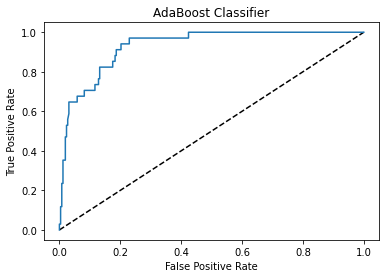

0.7510872053101395

In [137]:
y_pred_prob = ABC.predict_proba(x1_test)[:,1]
fpr7,tpr7,thresholds7 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr7,tpr7,label='AdaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier')
plt.show()
auc_score = roc_auc_score(y_test,ABC.predict(x1_test))
auc_score

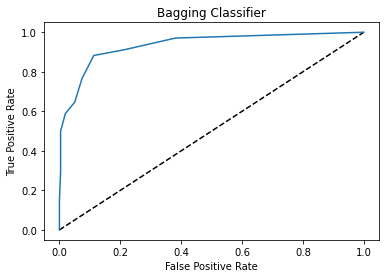

0.7982375829709315

In [138]:
y_pred_prob = BC.predict_proba(x1_test)[:,1]
fpr8,tpr8,thresholds8 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr8,tpr8,label='Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging Classifier')
plt.show()
auc_score = roc_auc_score(y_test,BC.predict(x1_test))
auc_score

Based on the Model Prediction we can conclude Random Forest Classifier is performing well
with Accuracy Score 93%, CV score 88.7% and AUC_ROC score  80%

# Creating Final Model

In [172]:
Final_Model = RandomForestClassifier(n_estimators=100)
Final_Model.fit(x1_train,y_train)
pred = Final_Model.predict(x1_test)
score = accuracy_score(y_test,pred)
print("Accuracy Score:",score*100)
print("Confusion Matrix: ", confusion_matrix(y_test,pred))
print("Classification_Report: ", classification_report(y_test,pred))

Accuracy Score: 94.15807560137456
Confusion Matrix:  [[251   6]
 [ 11  23]]
Classification_Report:                precision    recall  f1-score   support

           0       0.96      0.98      0.97       257
           1       0.79      0.68      0.73        34

    accuracy                           0.94       291
   macro avg       0.88      0.83      0.85       291
weighted avg       0.94      0.94      0.94       291



# Saving the model

In [173]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model,"Wine_Quality_Pred.pkl")

['Wine_Quality_Pred.pkl']

# Predicting the saved model

In [174]:
Pred_Model =joblib.load("Wine_Quality_Pred.pkl")

#Prediction

prediction = Pred_Model.predict(x1_test)
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

# Creating DataFrame for the predicted values

In [180]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Pred_Model.predict(x1_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


Our Model is performing well as we can see the predicted value is most similar with the Original Data.

# Predicting with Sample data 

In [177]:
# sample data'p' taken from the same dataset.

def winequality(p):
    p = p.reshape(1,-1)
    pred = Pred_Model.predict(p)
    print("Predicted value:", pred)
    if pred == 0:
        print("Quality of wine is bad")
    else:
        print("Quality of wine is good")
        
p = np.array([7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4])

winequality(p)

Predicted value: [0]
Quality of wine is bad


# Conclusion

The Quality of wine is good when the value of the physiochemical properties - alcohol,fixed acidity, citric acid 
and sulphates increases.

The Quality of wine is bad when the value of the physiochemical properties - acidity, chlorides,free sulfur dioxide, 
total sulfur dioxide, density and ph increase, so to the make quality of the wine good the value of these properties should
kept in certain level to main the quality